In [ ]:
# Assignment 1

Optimal Beta_s: 0.9999999999999956
Derived Beta_a: 0.4999999999999978


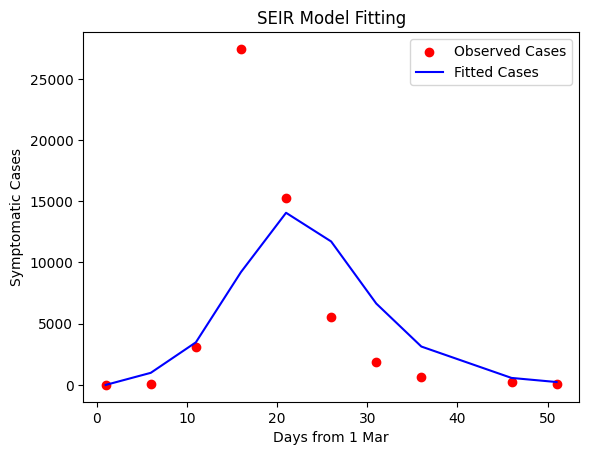

In [ ]:
import numpy as np
from scipy.integrate import odeint
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

def seir_model(t, beta_s):
    beta_a = beta_s / 2

    def deriv(y, t):
        S, E, Is, Ia, R, D = y

        dS = -beta_s * S * Is/N - beta_a * S * Ia/N
        dE = beta_s * S * Is/N + beta_a * S * Ia/N - alpha * E
        dIs = 0.6 * alpha * E - gamma_s * Is - CFR * gamma_s/(1-CFR) * Is
        dIa = 0.4 * alpha * E - gamma_a * Ia
        dR = gamma_s * Is + gamma_a * Ia
        dD = CFR * gamma_s/(1-CFR) * Is

        return dS, dE, dIs, dIa, dR, dD

    S0 = N - E0 - Is0 - Ia0 - R0 - D0
    solution = odeint(deriv, [S0, E0, Is0, Ia0, R0, D0], t)
    return solution[:, 2]

# Given Data
N = 100000
E0 = 1000
Is0 = 1
Ia0 = 100
R0 = 0
D0 = 0

alpha = 1/2
gamma_s = 1/5
gamma_a = 1/3
CFR = 0.1

# Updated Time points: 1 Mar, 6 Mar, 11 Mar, ...
t_data = [1, 6, 11, 16, 21, 26, 31, 36, 46,51]
cases = [1, 38, 3085, 27441, 15302, 5572, 1880, 623, 206, 68]

# Fit the model to the data with bounds
params, _ = curve_fit(seir_model, t_data, cases, p0=[0.7], bounds=([0], [1]))

beta_s_optimal = params[0]

print(f"Optimal Beta_s: {beta_s_optimal}")
print(f"Derived Beta_a: {beta_s_optimal/2}")

# Plotting the observed vs. fitted data
plt.scatter(t_data, cases, color='red', label='Observed Cases')
plt.plot(t_data, seir_model(t_data, *params), color='blue', label='Fitted Cases')
plt.legend()
plt.xlabel('Days from 1 Mar')
plt.ylabel('Symptomatic Cases')
plt.title('SEIR Model Fitting')
plt.show()



In [ ]:
# beta_s=0.999

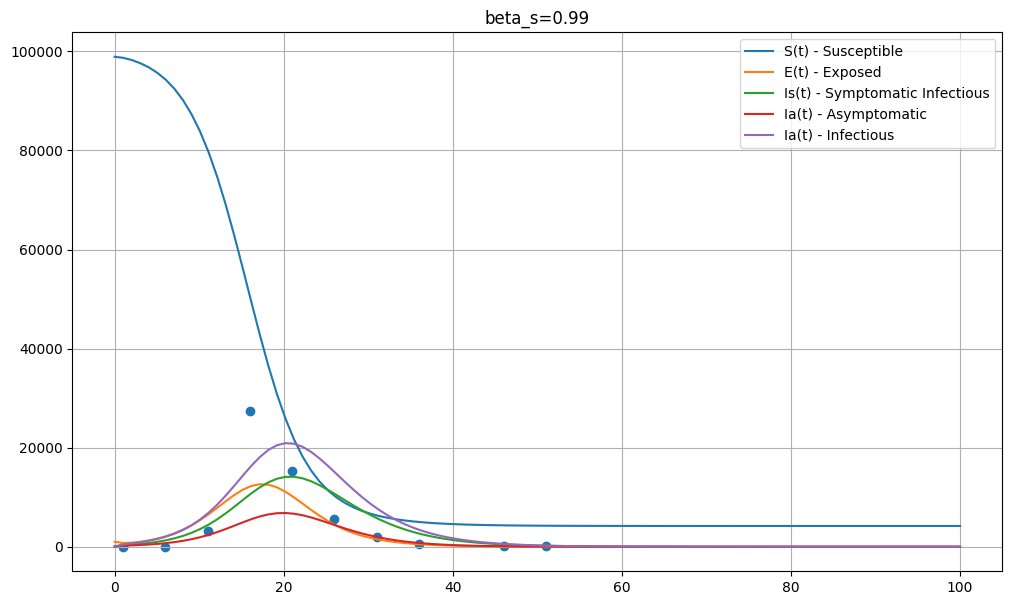

In [ ]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

def seir_model(y, t, beta_s, beta_a, alpha, gamma_s, gamma_a, CFR):
        S, E, Is, Ia, R, D,I = y

        dS = -beta_s * S * Is/N - beta_a * S * Ia/N
        dE = beta_s * S * Is/N + beta_a * S * Ia/N - alpha * E
        dIs = 0.6 * alpha * E - gamma_s * Is - CFR * gamma_s/(1-CFR) * Is
        dIa = 0.4 * alpha * E - gamma_a * Ia
        dI=dIs+dIa
        dR = gamma_s * Is + gamma_a * Ia
        dD = CFR * gamma_s/(1-CFR) * Is
        return [dS, dE, dIs, dIa, dR, dD,dI]

# Parameters
N = 100000
E0 = 1000  # Initial exposed
Is0 = 1 # Initial symptomatic infectious.
Ia0 = 100
R0 = 0
D0 = 0
I0=Ia0+Is0
S0 = N - E0 - Is0 - Ia0 - R0 - D0

alpha = 1/2
gamma_s = 1/5
gamma_a = 1/3
CFR = 0.1
beta_s = 0.9999
beta_a = beta_s*0.5

t = np.linspace(0, 100, 100)  # Time span

solution = odeint(seir_model, [S0, E0, Is0, Ia0, R0, D0,I0], t, args=(beta_s, beta_a, alpha, gamma_s, gamma_a, CFR))

# Plot
plt.figure(figsize=(12,7))
plt.plot(t, solution[:, 0], label="S(t) - Susceptible")
t_data = [1, 6, 11, 16, 21, 26, 31, 36, 46, 51]
cases = [1, 38, 3085, 27441, 15302, 5572, 1880, 623, 206, 68]
plt.scatter(t_data,cases)
plt.plot(t, solution[:, 1], label="E(t) - Exposed")
plt.plot(t, solution[:, 2], label="Is(t) - Symptomatic Infectious")
plt.plot(t, solution[:, 3], label="Ia(t) - Asymptomatic")
plt.plot(t, solution[:, 6], label="Ia(t) - Infectious")
plt.legend()
plt.title("beta_s=0.99")
plt.grid()
plt.show()


In [ ]:
# If beta_a=0

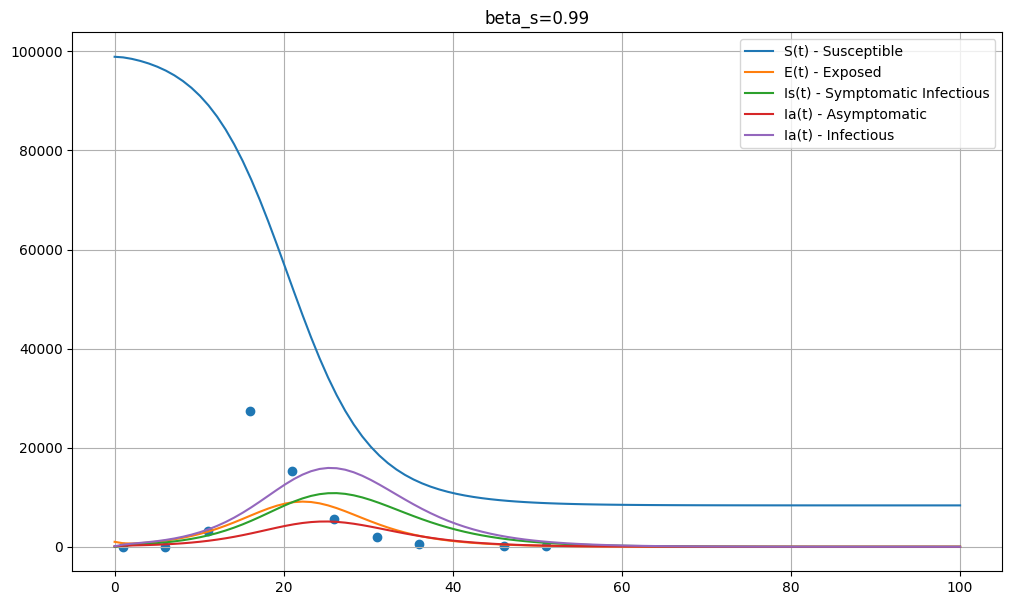

In [ ]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

def seir_model(y, t, beta_s, beta_a, alpha, gamma_s, gamma_a, CFR):
        S, E, Is, Ia, R, D,I = y

        dS = -beta_s * S * Is/N - beta_a * S * Ia/N
        dE = beta_s * S * Is/N + beta_a * S * Ia/N - alpha * E
        dIs = 0.6 * alpha * E - gamma_s * Is - CFR * gamma_s/(1-CFR) * Is
        dIa = 0.4 * alpha * E - gamma_a * Ia
        dI=dIs+dIa
        dR = gamma_s * Is + gamma_a * Ia
        dD = CFR * gamma_s/(1-CFR) * Is
        return [dS, dE, dIs, dIa, dR, dD,dI]

# Parameters
N = 100000
E0 = 1000  # Initial exposed
Is0 = 1 # Initial symptomatic infectious.
Ia0 = 100
R0 = 0
D0 = 0
I0=Ia0+Is0
S0 = N - E0 - Is0 - Ia0 - R0 - D0

alpha = 1/2
gamma_s = 1/5
gamma_a = 1/3
CFR = 0.1
beta_s = 0.9999
beta_a = 0

t = np.linspace(0, 100, 100)  # Time span

solution = odeint(seir_model, [S0, E0, Is0, Ia0, R0, D0,I0], t, args=(beta_s, beta_a, alpha, gamma_s, gamma_a, CFR))

# Plot
plt.figure(figsize=(12,7))
plt.plot(t, solution[:, 0], label="S(t) - Susceptible")
t_data = [1, 6, 11, 16, 21, 26, 31, 36, 46, 51]
cases = [1, 38, 3085, 27441, 15302, 5572, 1880, 623, 206, 68]
plt.scatter(t_data,cases)
plt.plot(t, solution[:, 1], label="E(t) - Exposed")
plt.plot(t, solution[:, 2], label="Is(t) - Symptomatic Infectious")
plt.plot(t, solution[:, 3], label="Ia(t) - Asymptomatic")
plt.plot(t, solution[:, 6], label="Ia(t) - Infectious")
plt.legend()
plt.title("beta_s=0.99")
plt.grid()
plt.show()


In [ ]:
# For Different transmision rates, beta_s=0.5

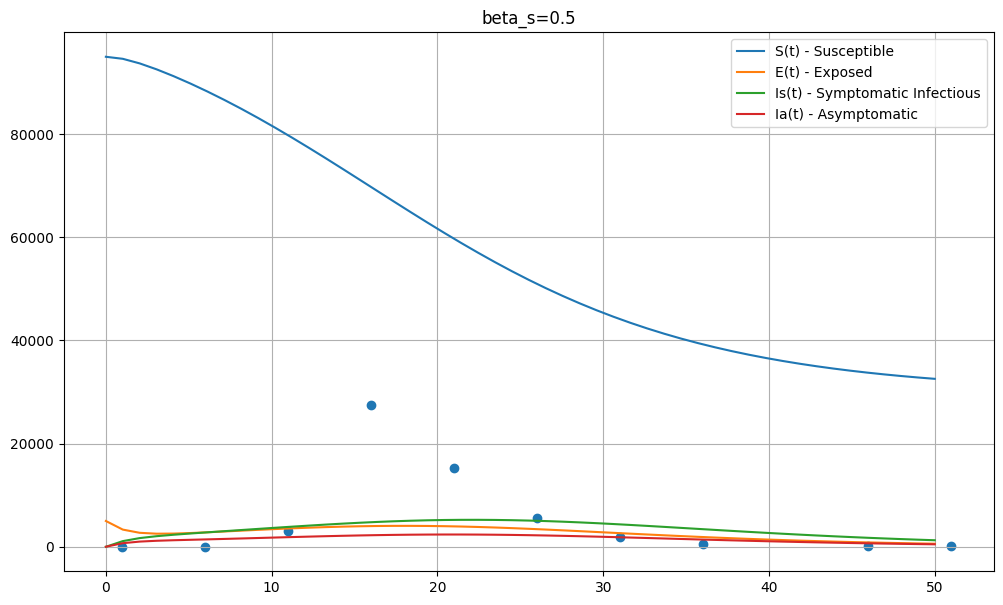

In [ ]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

def seir_model(y, t, beta_s, beta_a, alpha, gamma_s, gamma_a, CFR):
        S, E, Is, Ia, R, D = y

        dS = -beta_s * S * Is/N - beta_a * S * Ia/N
        dE = beta_s * S * Is/N + beta_a * S * Ia/N - alpha * E
        dIs = 0.6 * alpha * E - gamma_s * Is - CFR * gamma_s/(1-CFR) * Is
        dIa = 0.4 * alpha * E - gamma_a * Ia
        dR = gamma_s * Is + gamma_a * Ia
        dD = CFR * gamma_s/(1-CFR) * Is
        return [dS, dE, dIs, dIa, dR, dD]

# Parameters
N = 100000
E0 = 5000  # Initial exposed, you might need to adjust this based on your understanding of the epidemic's start.
Is0 = 1 # Initial symptomatic infectious, adjust based on the data.
Ia0 = 10
R0 = 0
D0 = 0
S0 = N - E0 - Is0 - Ia0 - R0 - D0

alpha = 1/2
gamma_s = 1/5
gamma_a = 1/3
CFR = 0.1
beta_s = 0.5  # This is a guessed value. In a real-world scenario, you'd want to fit this to data.
beta_a = 0.5 * beta_s

t = np.linspace(0, 50, 50)  # Time span, adjust as necessary

solution = odeint(seir_model, [S0, E0, Is0, Ia0, R0, D0], t, args=(beta_s, beta_a, alpha, gamma_s, gamma_a, CFR))

# Plot
plt.figure(figsize=(12,7))
plt.plot(t, solution[:, 0], label="S(t) - Susceptible")
t_data = [1, 6, 11, 16, 21, 26, 31, 36, 46, 51]
cases = [1, 38, 3085, 27441, 15302, 5572, 1880, 623, 206, 68]
plt.scatter(t_data,cases)
plt.plot(t, solution[:, 1], label="E(t) - Exposed")
plt.plot(t, solution[:, 2], label="Is(t) - Symptomatic Infectious")
plt.plot(t, solution[:, 3], label="Ia(t) - Asymptomatic")
plt.legend()
plt.title("beta_s=0.5")
plt.grid()
plt.show()


In [ ]:
# beta_s=0.7

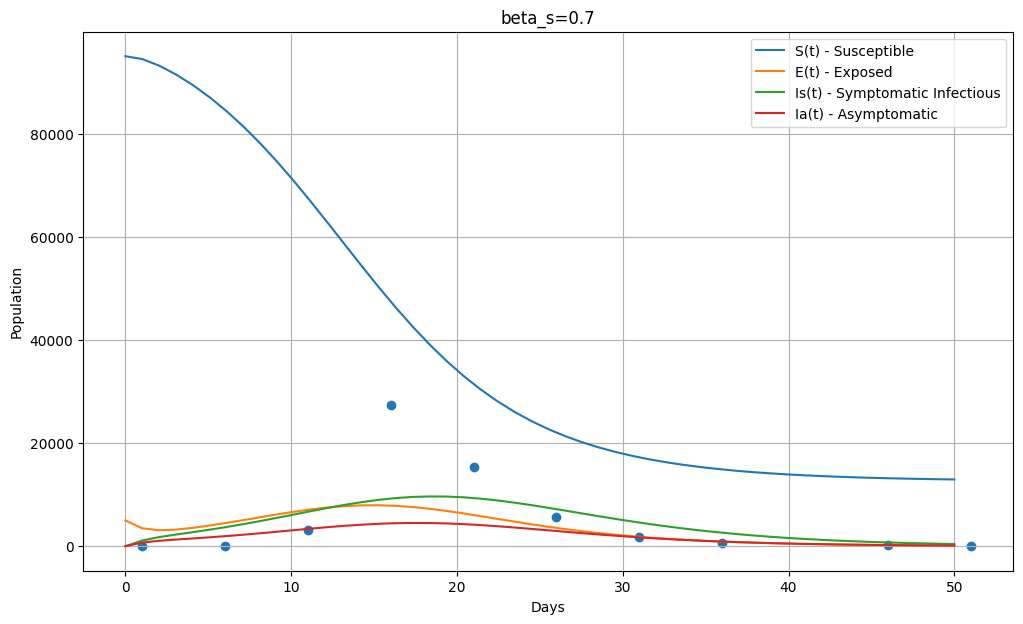

In [ ]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

def seir_model(y, t, beta_s, beta_a, alpha, gamma_s, gamma_a, CFR):
        S, E, Is, Ia, R, D = y

        dS = -beta_s * S * Is/N - beta_a * S * Ia/N
        dE = beta_s * S * Is/N + beta_a * S * Ia/N - alpha * E
        dIs = 0.6 * alpha * E - gamma_s * Is - CFR * gamma_s/(1-CFR) * Is
        dIa = 0.4 * alpha * E - gamma_a * Ia
        dR = gamma_s * Is + gamma_a * Ia
        dD = CFR * gamma_s/(1-CFR) * Is
        return [dS, dE, dIs, dIa, dR, dD]

# Parameters
N = 100000
E0 = 5000  # Initial exposed, you might need to adjust this based on your understanding of the epidemic's start.
Is0 = 1 # Initial symptomatic infectious, adjust based on the data.
Ia0 = 10
R0 = 0
D0 = 0
S0 = N - E0 - Is0 - Ia0 - R0 - D0

alpha = 1/2
gamma_s = 1/5
gamma_a = 1/3
CFR = 0.1
beta_s = 0.7  # This is a guessed value. In a real-world scenario, you'd want to fit this to data.
beta_a = 0.5 * beta_s

t = np.linspace(0, 50, 50)  # Time span, adjust as necessary

solution = odeint(seir_model, [S0, E0, Is0, Ia0, R0, D0], t, args=(beta_s, beta_a, alpha, gamma_s, gamma_a, CFR))

# Plot
plt.figure(figsize=(12,7))
plt.plot(t, solution[:, 0], label="S(t) - Susceptible")
t_data = [1, 6, 11, 16, 21, 26, 31, 36, 46, 51]
cases = [1, 38, 3085, 27441, 15302, 5572, 1880, 623, 206, 68]
plt.scatter(t_data,cases)
plt.plot(t, solution[:, 1], label="E(t) - Exposed")
plt.plot(t, solution[:, 2], label="Is(t) - Symptomatic Infectious")
plt.plot(t, solution[:, 3], label="Ia(t) - Asymptomatic")
plt.xlabel("Days")
plt.ylabel("Population")
plt.title("beta_s=0.7")
plt.legend()
plt.grid()
plt.show()


In [ ]:
# Assignment2

In [ ]:
# For q=0.5, d= 4 or 3 where q=no of symptomatic population quarantined for d days

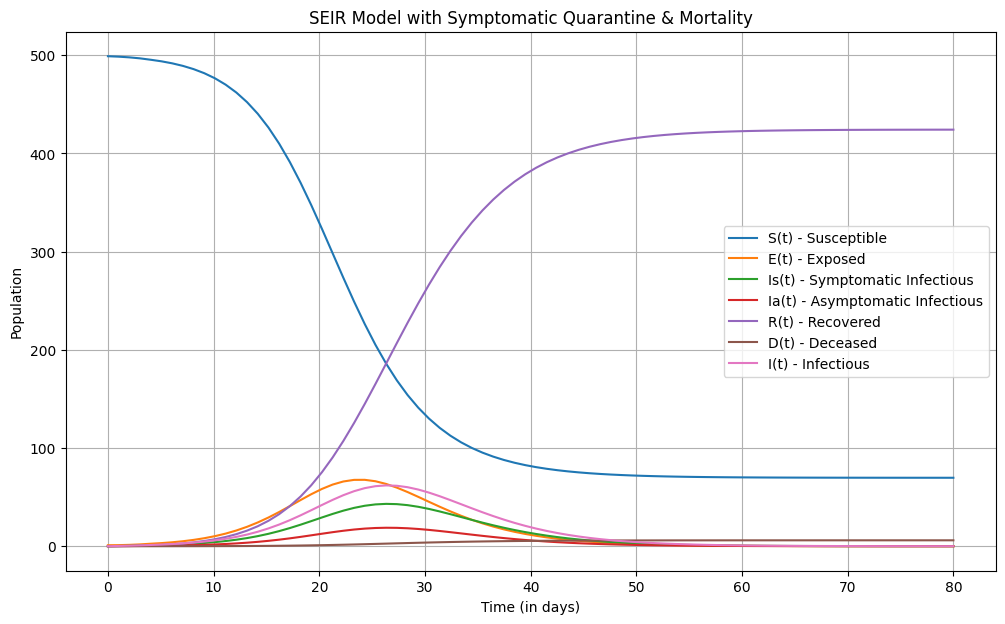

In [ ]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

def extended_seir_model_symptomatic_quarantine(y, t, beta, alpha, gamma, q, quarantine_start, CFR):
    S, E, Is, Ia, R, D,I0 = y

    # Apply quarantine factor after a certain time for symptomatic individuals
    if t >= quarantine_start:
        beta_eff = (beta) * (1 - q)
    else:
        beta_eff = beta

    dS = -beta_eff * S * Is/N - beta * S * Ia/N - 0.5 * beta * S * E/N
    dE = beta_eff * S * Is/N + beta * S * Ia/N + 0.5 * beta * S * E/N - alpha * E
    dIs = 0.7 * alpha * E - gamma * Is - CFR * gamma /(1-CFR) *Is
    dIa = 0.3 * alpha * E - gamma * Ia
    dR =  gamma * Is + gamma * Ia
    dD = CFR * gamma /(1-CFR) *Is
    dI0=dIs+dIa
    return [dS, dE, dIs, dIa, dR, dD, dI0]

# Parameters
N = 500
E0 = 1
Is0 = 0
Ia0 = 0
R0 = 0
D0 = 0
I0= Is0+Ia0
S0 = N - E0 - Is0 - Ia0 - R0 - D0

beta = 2/3
alpha = 1/3
gamma = 1/3
CFR = 0.02

t = np.linspace(0, 80, 80)

q = 0.5
quarantine_start = 4
solution = odeint(extended_seir_model_symptomatic_quarantine, [S0, E0, Is0, Ia0, R0, D0,I0], t, args=(beta, alpha, gamma, q, quarantine_start, CFR))

# Plot
plt.figure(figsize=(12,7))
plt.plot(t, solution[:, 0], label="S(t) - Susceptible")
plt.plot(t, solution[:, 1], label="E(t) - Exposed")
plt.plot(t, solution[:, 2], label="Is(t) - Symptomatic Infectious")
plt.plot(t, solution[:, 3], label="Ia(t) - Asymptomatic Infectious")
plt.plot(t, solution[:, 4], label="R(t) - Recovered")
plt.plot(t, solution[:, 5], label="D(t) - Deceased")
plt.plot(t, solution[:, 6], label="I(t) - Infectious")
plt.xlabel("Time (in days)")
plt.ylabel("Population")
plt.title("SEIR Model with Symptomatic Quarantine & Mortality")
plt.legend()
plt.grid(True)
plt.show()


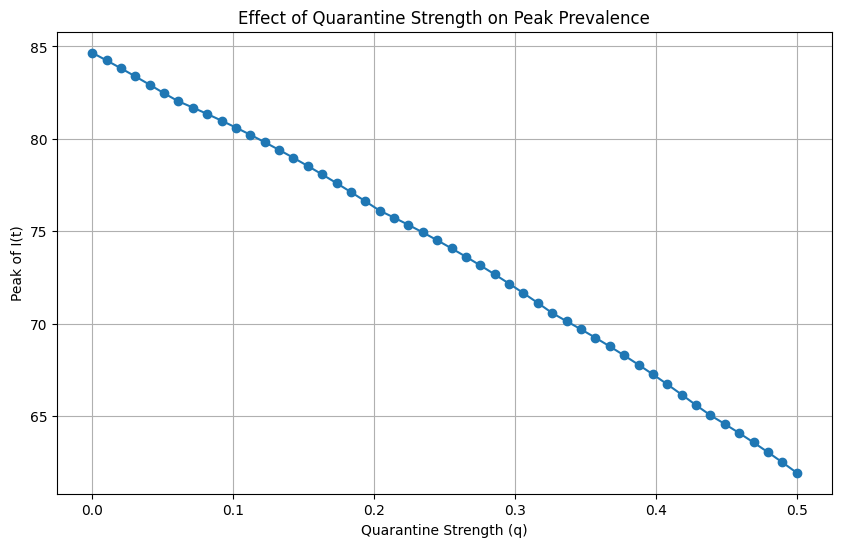

Percent reduction from q=0 to q=0.5: 26.83%


In [ ]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

def extended_seir_model_symptomatic_quarantine(y, t, beta, alpha, gamma, q, quarantine_start, CFR):
    S, E, Is, Ia, R, D, I0 = y

    # Apply quarantine factor after a certain time for symptomatic individuals
    if t >= quarantine_start:
        beta_eff = beta * (1 - q)
    else:
        beta_eff = beta

    dS = -beta_eff * S * Is/N - beta * S * Ia/N - 0.5 * beta * S * E/N
    dE = beta_eff * S * Is/N + beta * S * Ia/N + 0.5 * beta * S * E/N - alpha * E
    dIs = 0.7 * alpha * E - gamma * Is - CFR * gamma /(1-CFR) *Is
    dIa = 0.3 * alpha * E - gamma * Ia
    dR = gamma * Is + gamma * Ia
    dD = CFR * gamma /(1-CFR) *Is
    dI0 = dIs + dIa
    return [dS, dE, dIs, dIa, dR, dD, dI0]

# Parameters
N = 500
E0 = 1
Is0 = 0
Ia0 = 0
R0 = 0
D0 = 0
I0 = Is0 + Ia0
S0 = N - E0 - Is0 - Ia0 - R0 - D0

beta = 2/3
alpha = 1/3
gamma = 1/3
CFR = 0.02

t = np.linspace(0, 80, 80)

quarantine_start = 4

# Loop over 10 q values
q_values = np.linspace(0, 0.5, 50)
peak_values = []

for q in q_values:
    solution = odeint(extended_seir_model_symptomatic_quarantine, [S0, E0, Is0, Ia0, R0, D0, I0], t, args=(beta, alpha, gamma, q, quarantine_start, CFR))
    peak_values.append(max(solution[:, 6]))

# Plot the peak values
plt.figure(figsize=(10,6))
plt.plot(q_values, peak_values, '-o')
plt.xlabel("Quarantine Strength (q)")
plt.ylabel("Peak of I(t)")
plt.title("Effect of Quarantine Strength on Peak Prevalence")
plt.grid(True)
plt.show()
percent_reduction = (1 - peak_values[-1]/peak_values[0]) * 100
print(f"Percent reduction from q=0 to q=0.5: {percent_reduction:.2f}%")


In [ ]:
# It won't be same d=2 as the average duration of recovery is 3 days, so if quarantined is ended before that then there's a possibility of retransmisiion of disease which would change beta_s again.

In [ ]:
# Assignment 3

In [ ]:
# Assumptions- At the time of Vaccination, 1/10 th of the population was already infected.

Proportion to be vaccinated: 0.8577154308617234


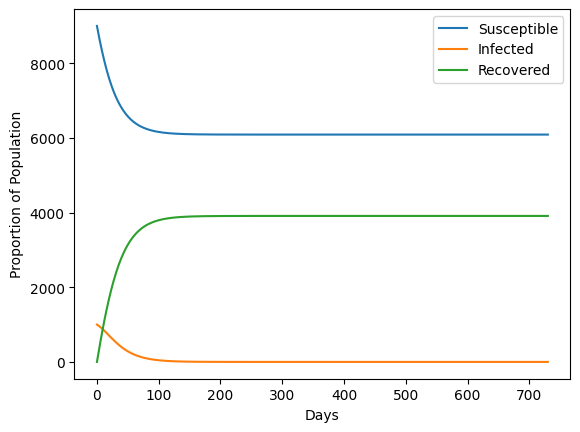

In [ ]:
from scipy.integrate import odeint
import numpy as np
import matplotlib.pyplot as plt

# Define the parameters
beta = 0.25  # transmission rate
gamma = 1/10  # recovery rate
beta_prime = 0.30 * beta  # effective transmission rate for vaccinated individuals
N = 10000  # total population

def SIR_model(Y, t, beta, gamma):
    s, i, r = Y
    ds_dt = -beta * s * i/N
    di_dt = beta * s/N * i - gamma * i
    dr_dt = gamma * i
    return [ds_dt, di_dt, dr_dt]

def effective_R0(p, beta, beta_prime, gamma):
    return (p * beta_prime + (1-p) * beta) / gamma

# Find the proportion p that needs to be vaccinated
p_values = np.linspace(0, 1, 500)
for p in p_values:
    if effective_R0(p, beta, beta_prime, gamma) < 1:
        break

print(f"Proportion to be vaccinated: {p}")

# Initial conditions
S0 = N - 1000   # almost the entire population is susceptible
I0 = 1000       # start with 1 infected individual
R0 = 0       # no one has recovered yet


initial_conditions = [S0, I0, R0]

t = np.linspace(0, 730, 730)  # simulate for 2 years
sol = odeint(SIR_model, initial_conditions, t, args=(beta - p*(beta - beta_prime), gamma))

# Plot the results
plt.plot(t, sol[:, 0], label='Susceptible')
plt.plot(t, sol[:, 1], label='Infected')
plt.plot(t, sol[:, 2], label='Recovered')
plt.legend()
plt.xlabel('Days')
plt.ylabel('Proportion of Population')
plt.show()
